<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/lnd_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from random import shuffle
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
path = '/content/drive/MyDrive/LUNG_NODULE_DETECTION-20230303T162309Z-001-20230307T063042Z-001/LUNG_NODULE_DETECTION-20230303T162309Z-001/LUNG_NODULE_DET1/lung_detection'

IMAGE_WIDTH = 1024
IMAGE_HEIGHT = 1024

IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   
                                  
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
       )

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/LUNG_NODULE_DETECTION-20230303T162309Z-001-20230307T063042Z-001/LUNG_NODULE_DETECTION-20230303T162309Z-001/LUNG_NODULE_DET1/lung_detection/train',
                                                   target_size = IMAGE_SIZE,
                                                   class_mode = 'binary',
                                                   subset = 'training',
                                                   batch_size = 4)

Found 1230 images belonging to 2 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/LUNG_NODULE_DETECTION-20230303T162309Z-001-20230307T063042Z-001/LUNG_NODULE_DETECTION-20230303T162309Z-001/LUNG_NODULE_DET1/lung_detection/test',
                                                  target_size = IMAGE_SIZE,
                                                  class_mode = 'binary',
                                                  batch_size = 4)

Found 268 images belonging to 2 classes.


(300, 300, 3)
(1, 300, 300, 3)


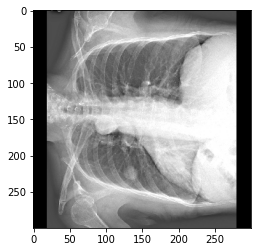

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/LUNG_NODULE_DETECTION-20230303T162309Z-001-20230307T063042Z-001/LUNG_NODULE_DETECTION-20230303T162309Z-001/LUNG_NODULE_DET1/lung_detection/train/NODULE/n0001.png",target_size=(300,300))
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', name='predictions')) 

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1022, 1022, 32)    896       
                                                                 
 batch_normalization (BatchN  (None, 1022, 1022, 32)   128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 511, 511, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 511, 511, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 509, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 509, 509, 64)     2

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

In [ ]:
epochs = 25

history = model.fit_generator (
    
    train_dataset, 
    epochs = epochs,
    validation_data = test_dataset,
    #callbacks = callbacks
)

<ipython-input-10-55c8a33b383a>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator (


Epoch 1/25
308/308 [==============================] - 636s 2s/step - loss: 1.0765 - accuracy: 0.5033 - val_loss: 2.2320 - val_accuracy: 0.5000
Epoch 2/25
308/308 [==============================] - 409s 1s/step - loss: 0.8932 - accuracy: 0.5220 - val_loss: 0.7359 - val_accuracy: 0.6045
Epoch 3/25
308/308 [==============================] - 411s 1s/step - loss: 0.8207 - accuracy: 0.5203 - val_loss: 3.2773 - val_accuracy: 0.5000
Epoch 4/25
308/308 [==============================] - 406s 1s/step - loss: 0.7505 - accuracy: 0.5577 - val_loss: 1.2348 - val_accuracy: 0.5000
Epoch 5/25
308/308 [==============================] - 407s 1s/step - loss: 0.7094 - accuracy: 0.5797 - val_loss: 1.4102 - val_accuracy: 0.5000
Epoch 6/25
308/308 [==============================] - 411s 1s/step - loss: 0.6064 - accuracy: 0.6585 - val_loss: 13.2560 - val_accuracy: 0.5000
Epoch 7/25
308/308 [==============================] - 408s 1s/step - loss: 0.5289 - accuracy: 0.7407 - val_loss: 60.1859 - val_accuracy: 0.50